In [ ]:
import scanpy as sc

adata = sc.read_h5ad('GSE132188_adata.h5ad.h5')

# 查看基本信息
print(adata)
print(adata.obs.head())
print(adata.var.head())
print(adata.X.shape)


AnnData object with n_obs × n_vars = 36351 × 17327
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'Ngn3+_colors', 'PCs_loading_hvg', 'clusters_fig2_final_colors', 'clusters_fig3_final_colors', 'clusters_fig3_final_noep_colors', 'clusters_fig4_final_colors', 'clusters_fig6_alpha_final_colors', 'clusters_fig6_broad_final_colors', 'clusters_fig6_fine_final_colors', 'day_colors', 'neighbors', 'pca', 'proliferation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
                       day  n_counts  log_counts  n_genes   mt_frac  \
index                                                                 
AAACCTGAGCACCGCT-1-0  12.5

d:\coding\anaconda3\envs\DeepRUOT\lib\site-packages\anndata\compat\__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
d:\coding\anaconda3\envs\DeepRUOT\lib\site-packages\anndata\compat\__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [ ]:
import numpy as np

unique_days = adata.obs['day'].unique()
print("Unique days:", unique_days)

print("Number of unique days:", len(unique_days))


Unique days: ['12.5', '13.5', '14.5', '15.5']
Categories (4, object): ['12.5', '13.5', '14.5', '15.5']
Number of unique days: 4


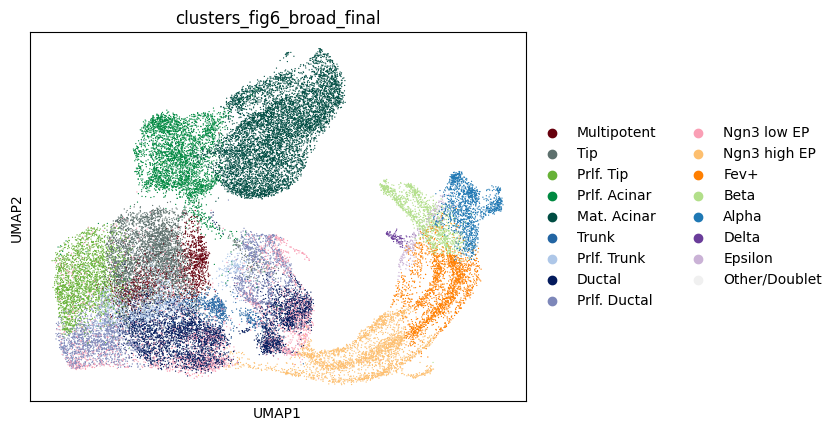

In [3]:
sc.pl.umap(adata, color='clusters_fig6_broad_final')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_umap_by_type_last_day(adata, day_column='day', type_column='clusters_fig6_fine_final'):
    adata_day = adata[(adata.obs[day_column] == '15.5')|(adata.obs[day_column] == '14.5')]

    umap = adata_day.obsm['X_umap']
    df_plot = pd.DataFrame(umap, columns=['UMAP1', 'UMAP2'], index=adata_day.obs_names)

    df_plot['type'] = adata_day.obs[type_column].values
    print(df_plot['type'].value_counts())
    print(df_plot)

    # 4. 可视化
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_plot, x='UMAP1', y='UMAP2', hue='type', palette='tab10', s=10)
    plt.title(f'UMAP colored by type (day = 14.5 and 15.5)')
    plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


type
Acinar             10391
Ductal              2433
Ngn3 High late      1693
Fev+ Beta           1338
Beta                1177
Alpha               1119
Ngn3 low EP         1104
Trunk                322
Epsilon              223
Tip                  161
Fev+ Pyy             116
Fev+ Alpha           109
Delta                102
Fev+ Delta            99
Fev+ Epsilon          96
Ngn3 High early       21
Multipotent           15
Name: count, dtype: int64
                          UMAP1     UMAP2       type
index                                               
AAACCTGAGATCCCGC-1-2   6.778226  1.171704       Beta
AAACCTGAGCAGGTCA-1-2  -5.634332  5.085286     Acinar
AAACCTGCAATGAATG-1-2 -10.041831 -1.682337     Acinar
AAACCTGCAATTGCTG-1-2   7.363686  2.097814       Beta
AAACCTGCACAGAGGT-1-2   9.652727 -2.872787  Fev+ Beta
...                         ...       ...        ...
TTTGTCAGTTGTTTGG-1-3  -0.228722 -6.880492     Ductal
TTTGTCATCCTGCAGG-1-3   0.183985  1.994729     Acinar
TTTGTCATCGAATG

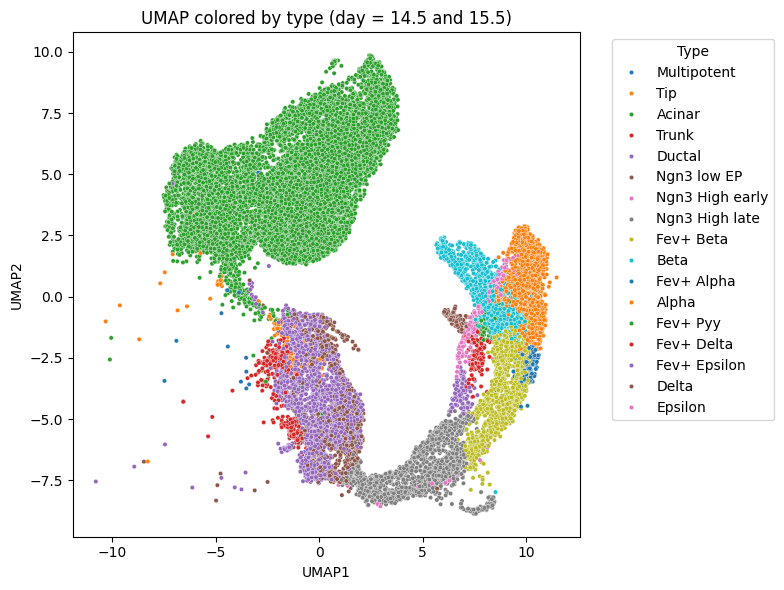

In [6]:
plot_umap_by_type_last_day(adata)

In [ ]:
def extract_branch_filtered_expression_from_hvg_v2(adata, top_k=1000):
        branch_map_145 = {
        "Fev+ Alpha": 0, "Fev+ Beta": 0, "Fev+ Delta": 0, "Fev+ Epsilon": 0,
        "Alpha": 0, "Beta": 0, "Delta": 0, "Epsilon": 0,
        "Ngn3 High early": 1, "Ngn3 High late": 1,
        "Ductal": 2, "Tip": 2, "Acinar": 2
        }
        branch_map_155 = {"Alpha": 0, "Beta": 0, "Delta": 0,
        "Ngn3 High early": 1, "Ngn3 High late": 1,
        "Epsilon": 0, "Ductal": 2, "Acinar": 2
        }

        valid_types_145 = list(branch_map_145.keys())
        valid_types_155 = list(branch_map_155.keys())
        mask = adata[adata.obs["day"] == '14.5'].copy().obs["clusters_fig6_fine_final"].isin(valid_types_145)
        adata_14_5 = adata[adata.obs["day"] == '14.5'][mask].copy()
        mask = adata[adata.obs["day"] == '15.5'].copy().obs["clusters_fig6_fine_final"].isin(valid_types_155)
        adata_15_5 = adata[adata.obs["day"] == '15.5'][mask].copy()

   
        adata_14_5.obs["branch"] = adata_14_5.obs["clusters_fig6_fine_final"].map(branch_map_145)
        adata_15_5.obs["branch"] = adata_15_5.obs["clusters_fig6_fine_final"].map(branch_map_155)
        adata_sub = adata_14_5.concatenate(adata_15_5)



        hvg_mask = adata_sub.var["highly_variable_genes"].astype(bool)
        hvg_genes = adata_sub.var_names[hvg_mask]
        if top_k is not None:
                hvg_genes = hvg_genes[:top_k]

        expr = (
                adata_sub[:, hvg_genes].X.toarray()
                if hasattr(adata_sub.X, 'toarray')
                else adata_sub[:, hvg_genes].X
        )
        df = pd.DataFrame(expr, index=adata_sub.obs_names, columns=hvg_genes)
        df.insert(0, "branch", adata_sub.obs["branch"].values)
        df.insert(0, "cell_type", adata_sub.obs["clusters_fig6_fine_final"].values)
        df.insert(0,'samples',adata_sub.obs['day'].values)

        return df

In [10]:
df_hvg_all = extract_branch_filtered_expression_from_hvg_v2(adata, top_k=None)
df_hvg_all.samples.value_counts()

C:\Users\admin\AppData\Local\Temp\ipykernel_27572\43232011.py:25: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_sub = adata_14_5.concatenate(adata_15_5)


samples
15.5    9972
14.5    8424
Name: count, dtype: int64

In [12]:
df_hvg_all

index,samples,cell_type,branch,St18,Sntg1,Tcf24,Cops5,Cspp1,Sulf1,Kcnb2,...,Afap1l2,Trub1,Pnliprp1,Slc18a2,Emx2,E330013P04Rik,Nanos1,mt-Atp6,mt-Co3,PISD
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGATCCCGC-1-2-0,14.5,Beta,0,1.437941,0.0,0.0,1.437941,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.437941,6.592905,6.315893,1.437941
AAACCTGAGCAGGTCA-1-2-0,14.5,Acinar,2,0.000000,0.0,0.0,1.149678,0.784777,0.0,0.000000,...,0.0,0.495139,3.214371,0.000000,0.0,0.0,0.000000,3.540120,3.471533,0.495139
AAACCTGCAATGAATG-1-2-0,14.5,Acinar,2,0.000000,0.0,0.0,1.082175,0.000000,0.0,0.000000,...,0.0,0.738699,1.477399,0.000000,0.0,0.0,0.000000,3.241124,3.298273,0.000000
AAACCTGCAATTGCTG-1-2-0,14.5,Beta,0,0.000000,0.0,0.0,1.291140,0.000000,0.0,1.629238,...,0.0,0.000000,1.629238,0.000000,0.0,0.0,0.000000,4.869205,4.364363,1.629238
AAACCTGCACAGAGGT-1-2-0,14.5,Fev+ Beta,0,0.970503,0.0,0.0,0.970503,0.000000,0.0,0.000000,...,0.0,0.000000,1.538211,0.970503,0.0,0.0,0.000000,5.329861,5.298396,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGTTTGG-1-3-1,15.5,Ductal,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.204078,3.380275,0.000000,0.0,0.0,0.000000,6.073846,6.573585,0.000000
TTTGTCATCCTGCAGG-1-3-1,15.5,Acinar,2,0.000000,0.0,0.0,1.015746,0.507873,0.0,0.000000,...,0.0,0.000000,4.835765,0.000000,0.0,0.0,0.000000,3.416930,3.219839,0.507873
TTTGTCATCGAATGCT-1-3-1,15.5,Alpha,0,0.000000,0.0,0.0,2.471245,1.179083,0.0,0.000000,...,0.0,0.000000,2.752826,0.743919,0.0,0.0,0.000000,4.496538,4.463513,1.179083


In [13]:
def keep_topk_variable_genes(df, k=100):
    # 取出基因列（去掉前两列 cell_type 和 branch）
    gene_cols = df.columns[3:]
    
    # 计算方差并选出 top-k
    variances = df[gene_cols].var(axis=0)
    topk_genes = variances.sort_values(ascending=False).head(k).index.tolist()
    
    # 保留 cell_type, branch 和 top-k 基因列
    df_topk = df[["cell_type", "branch","samples"] + topk_genes]
    
    return df_topk



In [14]:
df_top_var = keep_topk_variable_genes(df_hvg_all, k=2000)
df_top_var.to_csv("pancrease_2000d.csv",index=False)

In [ ]:
df_top_var